In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [13]:
# View all of the classes that automap found
Base.classes.keys()



['measurement', 'station']

In [14]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [16]:
# Find the most recent date in the data set.
first_row=session.query(func.max(Measurement.date)).all()
first_row

[('2017-08-23')]

Query Date:  2016-08-23


<AxesSubplot:xlabel='date'>

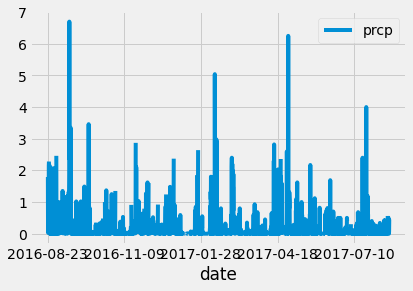

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

query_date= dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Starting from the most recent data point in the database. 
recent_data=session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= query_date).all()
Measurement_date_df=pd.DataFrame(recent_data)

# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_date_df=Measurement_date_df.set_index('date')

# Sort the dataframe by date
Date_sorted=Measurement_date_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
Date_sorted.plot()



In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Date_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the datase
session.query(Station).first().__dict__
Station_number=session.query(func.count(Station.station)).all()
Station_number

[(9)]

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Station_number=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Station_number

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
#session.close()

NameError: name 'session' is not defined